# First Program

## Step 1 : Import Libraries

### Let's import some libraries to get started!

In [75]:
import matplotlib.pyplot as plt
import numpy as np


## Step 2 : Create Data 
we will use the same data for the train and for the test

In [87]:
X = np.arange(10).reshape(-1,1)
Y= np.array([0,0,0,0,1,1,1,1,1,1])

x_test = np.array([10,3,11,12,1,15,16,13]).reshape(-1,1)
y_test= np.array([0,0,0,0,1,1,1,1])

In [88]:
print(X.shape)
print(Y.shape)


(10, 1)
(10,)


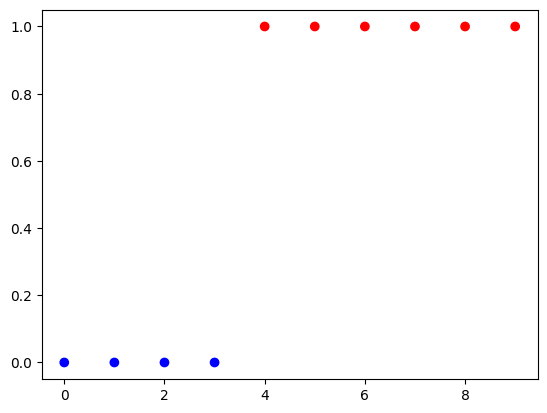

In [89]:
plt.scatter(X, Y, c=Y, cmap='bwr')

## Step 3 -Build a Logistic regression model for classification

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

## Step 4 : Train The Model

In [91]:
model.fit(X,Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [92]:
print(model.coef_)
print(model.intercept_)

[[1.18109091]]
[-4.12617727]


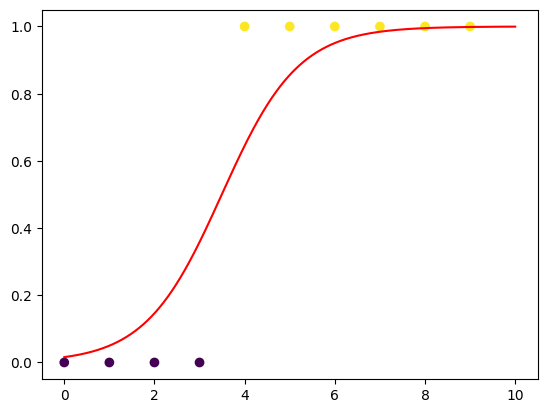

In [93]:
ordonne = np.linspace(0,10,1000)
plt.scatter(X,Y,c=Y)
plt.plot(ordonne, 1 /( 1 + np.exp(- model.coef_[0][0] *ordonne - model.intercept_[0] )),color='r')

## Step 5  Evaluation 

In [37]:
y_predict = model.predict(X)
print(y_predict)

[0 0 0 0 1 1 1 1 1 1]


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(Y,y_predict)

array([[4, 0],
       [0, 6]])

In [41]:
tn , fp , fn ,tp = confusion_matrix(Y,y_predict).ravel()
print(tn , fp , fn ,tp)

4 0 0 6


In [42]:
print(classification_report(Y,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Step 6 : Plot ROC Curve

Premiere Methode

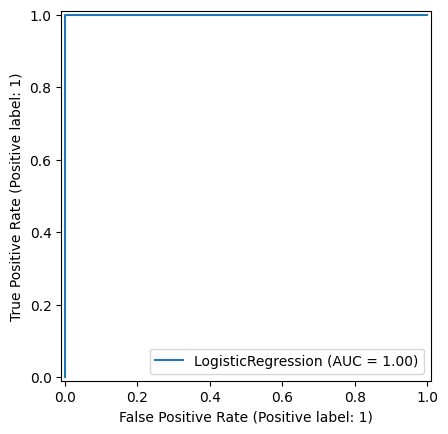

In [44]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(model, X, Y)
plt.show()

Deuxieme methode

In [46]:
model.predict_proba(X)

array([[0.98411203, 0.01588797],
       [0.95003074, 0.04996926],
       [0.85370936, 0.14629064],
       [0.64173546, 0.35826454],
       [0.35475873, 0.64524127],
       [0.1443924 , 0.8556076 ],
       [0.04924876, 0.95075124],
       [0.01565079, 0.98434921],
       [0.00485659, 0.99514341],
       [0.00149573, 0.99850427]])

In [48]:
y_test_predict_probs= model.predict_proba(X)[:,1]# gives the prob foe each target class
#we just need the prob for class 1
print(y_test_predict_probs)

[0.01588797 0.04996926 0.14629064 0.35826454 0.64524127 0.8556076
 0.95075124 0.98434921 0.99514341 0.99850427]


[0. 0. 0. 1.] [0.         0.16666667 1.         1.        ] [       inf 0.99850427 0.64524127 0.01588797]


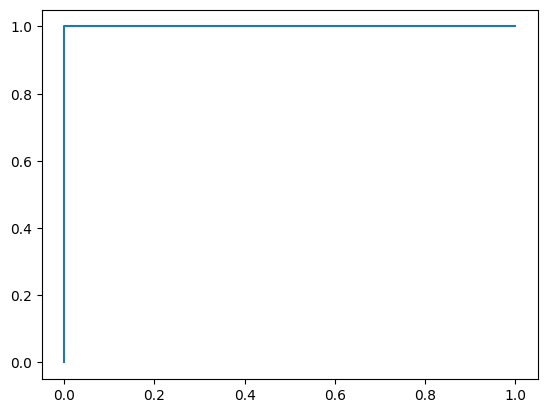

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr ,tpr , thresholds = roc_curve(Y,y_test_predict_probs)
print(fpr ,tpr , thresholds)
plt.plot(fpr ,tpr)

In [52]:
test_auc_roc = roc_auc_score (Y,y_test_predict_probs)
print('Testing AUC :', test_auc_roc )

Testing AUC : 1.0


In [54]:
from numpy import argmax 
best =tpr-fpr
lx= argmax(best)
best_threshold = thresholds[lx]
print('best threshold = ',best_threshold)


best threshold =  0.6452412693565707


In [57]:
from sklearn import metrics 
longre_y_decision = model.decision_function(X)
print(longre_y_decision)


[-4.12617727 -2.94508636 -1.76399544 -0.58290453  0.59818638  1.77927729
  2.96036821  4.14145912  5.32255003  6.50364095]


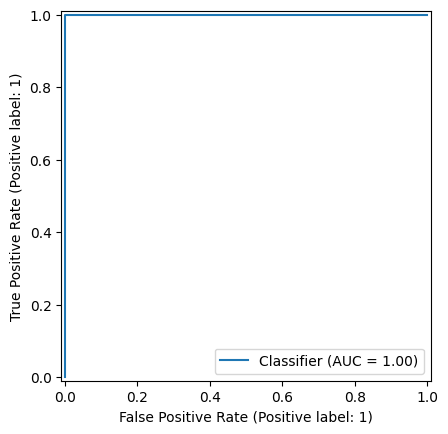

In [60]:
metrics.RocCurveDisplay.from_predictions(Y,longre_y_decision)

# Drow the decision boundary 

In [94]:
X_train = np.array([
    [0, 0],
    [0, 1],
    [1, 1],
    [1, 0],
    [2, 3],
    [3, 2],
    [3, 3],
    [2, 2],
    [4, 4],
    [3, 4]
])

y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

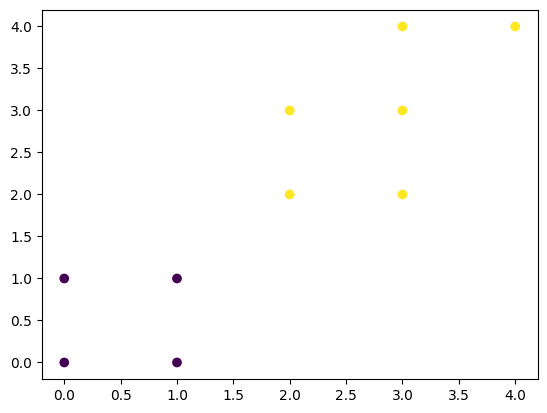

In [95]:
plt.scatter(X_train[:,0],X_train[:,1], c= y_train)

In [96]:
model1 = LogisticRegression()

In [97]:
model1.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


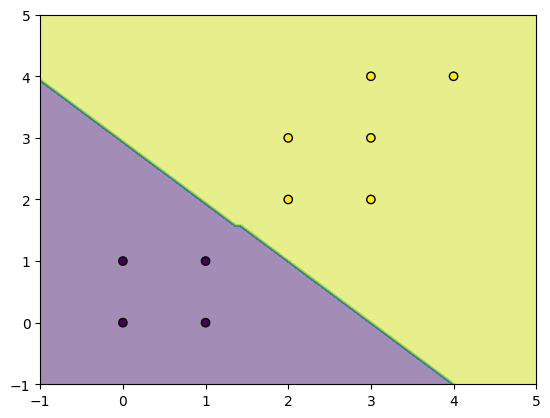

In [101]:
from sklearn.inspection import  DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(model1,X_train,response_method ="predict",alpha=0.5)
disp.ax_.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolor='k')
plt.show()